<a href="https://colab.research.google.com/github/hongyuw0427/Final-Year-Project/blob/main/FYP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Mount google drive and read datasets

In [8]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FYP/cyberbullying_tweets.csv')

Mounted at /content/drive


# Task
Analyze the `cyberbullying_tweets.csv` dataset by correcting column names, handling duplicate rows, checking for null values, analyzing and visualizing the distribution of `cyberbullying_type`, calculating and visualizing tweet text lengths to identify outliers, and applying text cleaning techniques to create a new `clean_text` column; finally, summarize all data cleaning steps performed and present the updated dataset information.

## Correct Column Names and Handle Duplicates

### Subtask:
Rename the column `label` to `cyberbullying_type` and `text` to `tweet_text` to align with the analysis requirements. After renaming, identify and drop any duplicate rows from the DataFrame.


**Reasoning**:
The subtask requires renaming columns and removing duplicate rows. Based on the provided `df` in the kernel state, the columns `tweet_text` and `cyberbullying_type` are already correctly named. Therefore, I will proceed with removing duplicate rows and then display the head and shape of the DataFrame to verify the changes.



In [14]:
df_original_shape = df.shape
print(f"Original DataFrame shape: {df_original_shape}")

df.drop_duplicates(inplace=True)

print(f"DataFrame shape after dropping duplicates: {df.shape}")
print(f"Number of duplicate rows removed: {df_original_shape[0] - df.shape[0]}")


print("\nFirst 5 rows of the updated DataFrame:")
print(df.head())


Original DataFrame shape: (47692, 2)
DataFrame shape after dropping duplicates: (47649, 2)
Number of duplicate rows removed: 43

First 5 rows of the updated DataFrame:
                                          tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying


### Re-checking for Duplicate Rows and DataFrame Shape

In [27]:
print(f"Current DataFrame shape: {df.shape}")
print(f"Number of duplicate rows remaining in df: {df.duplicated().sum()}")

Current DataFrame shape: (47649, 4)
Number of duplicate rows remaining in df: 0


## Check for Null Values

### Subtask:
After correcting column names and handling duplicates, check for any missing values across all columns in the DataFrame and display the count of null values per column.


**Reasoning**:
I will display the count of null values for each column in the DataFrame to check for missing data, as per the subtask instructions.



In [15]:
print("Null values per column:\n", df.isnull().sum())

Null values per column:
 tweet_text            0
cyberbullying_type    0
dtype: int64


## Analyze and Visualize Class Distribution

### Subtask:
Analyze the distribution of the `cyberbullying_type` column to identify any class imbalances and visualize it using a countplot, ensuring a clear legend.


**Reasoning**:
First, I will calculate and display the value counts for the 'cyberbullying_type' column to understand the numerical distribution of each class.



In [16]:
print("Distribution of cyberbullying_type:\n", df['cyberbullying_type'].value_counts())

Distribution of cyberbullying_type:
 cyberbullying_type
religion               7997
age                    7990
ethnicity              7959
gender                 7945
not_cyberbullying      7937
other_cyberbullying    7821
Name: count, dtype: int64


**Reasoning**:
I will create a countplot to visualize the distribution of the 'cyberbullying_type' column, add a title, and label the axes as instructed, to clearly show any class imbalances.



/tmp/ipython-input-1384403926.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='cyberbullying_type', palette='viridis')


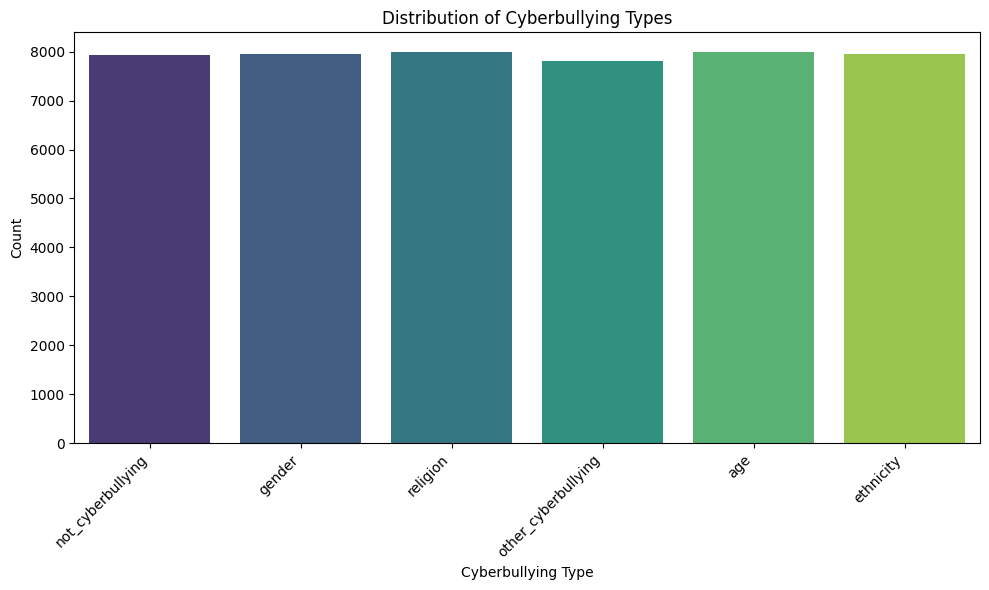

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cyberbullying_type', palette='viridis')
plt.title('Distribution of Cyberbullying Types')
plt.xlabel('Cyberbullying Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code block generated a `FutureWarning` because `palette` was used without `hue`. To fix this and follow best practices for newer Seaborn versions, I will explicitly set `hue` to `cyberbullying_type` and `legend=False` to ensure the correct color mapping and suppress the warning.



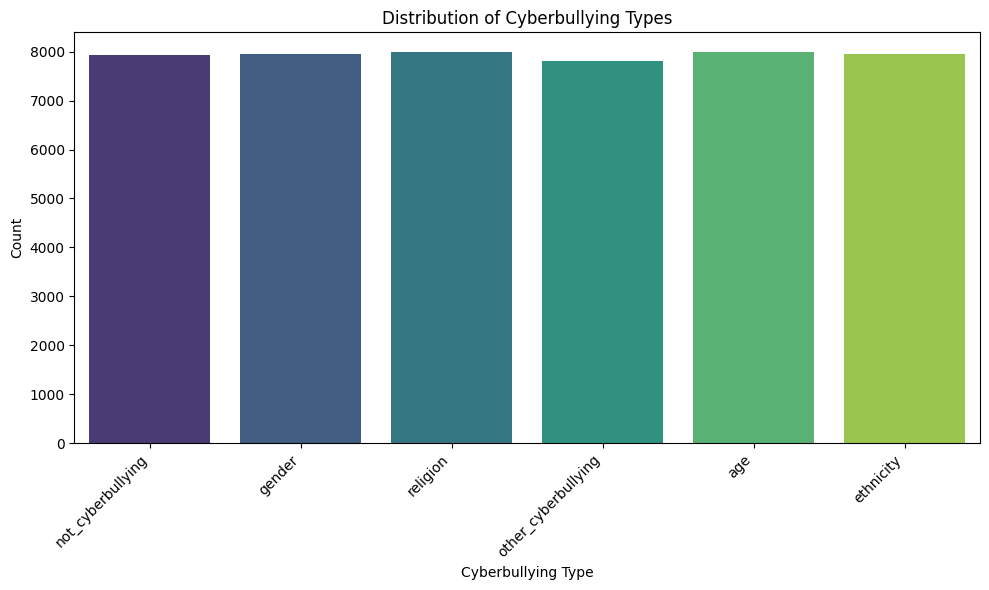

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cyberbullying_type', hue='cyberbullying_type', palette='viridis', legend=False)
plt.title('Distribution of Cyberbullying Types')
plt.xlabel('Cyberbullying Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Calculate and Analyze Text Length for Outliers

### Subtask:
Calculate the length of the `tweet_text` column (e.g., number of characters or words) and analyze its descriptive statistics. Visualize the distribution of text lengths using a histogram or boxplot to identify potential outliers, including a legend.


**Reasoning**:
I will calculate the character length of each tweet in the `tweet_text` column and store it in a new column called `text_length` to prepare for further analysis and visualization.



In [19]:
df['text_length'] = df['tweet_text'].apply(len)
print("First 5 rows with new 'text_length' column:")
print(df.head())

First 5 rows with new 'text_length' column:
                                          tweet_text cyberbullying_type  \
0  In other words #katandandre, your food was cra...  not_cyberbullying   
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   

   text_length  
0           61  
1          115  
2           60  
3          103  
4          103  


**Reasoning**:
I will display the descriptive statistics (mean, median, min, max, etc.) of the newly created `text_length` column to understand its distribution and central tendencies, as requested by the subtask.



In [20]:
print("Descriptive statistics for 'text_length' column:\n", df['text_length'].describe())

Descriptive statistics for 'text_length' column:
 count    47649.000000
mean       136.248022
std         85.245850
min          1.000000
25%         78.000000
50%        124.000000
75%        180.000000
max       5018.000000
Name: text_length, dtype: float64


**Reasoning**:
I will create a histogram to visualize the distribution of the `text_length` column, providing a title and appropriate axis labels, as required by the subtask.



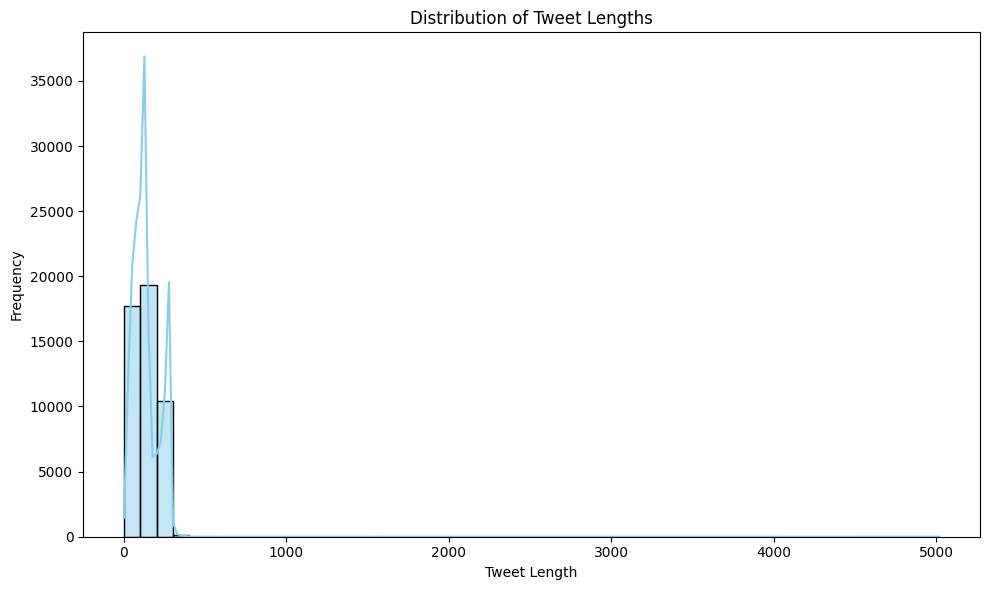

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Reasoning**:
I will create a boxplot of the `text_length` column to visualize the distribution and clearly identify potential outliers, as specified by the subtask.



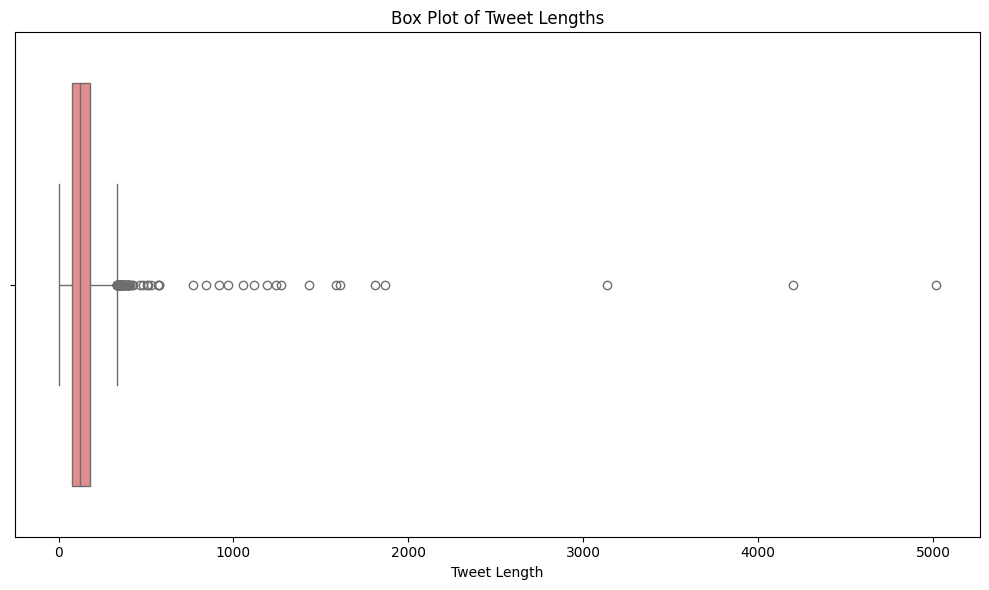

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['text_length'], color='lightcoral')
plt.title('Box Plot of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.tight_layout()
plt.show()

## Apply Text Cleaning

### Subtask:
Apply a text cleaning process to the `tweet_text` column, including removing URLs, mentions, hashtags, punctuation, numbers, stopwords, and performing lemmatization, to create a new `clean_text` column. Display a sample of the original and cleaned text.


**Reasoning**:
The subtask requires downloading NLTK data for stopwords and wordnet. I will use `nltk.download()` to ensure these are available before defining the cleaning function.



In [23]:
nltk.download('stopwords')
nltk.download('wordnet')

print("NLTK stopwords and wordnet downloaded.")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


NLTK stopwords and wordnet downloaded.


**Reasoning**:
I will define a cleaning function `clean_text_function` that performs the specified text cleaning steps (removing URLs, mentions, hashtags, punctuation, numbers, converting to lowercase, tokenization, stopword removal, and lemmatization) and then apply it to the `tweet_text` column to create `clean_text`.



In [24]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text_function(text):
    # a. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # b. Remove user mentions
    text = re.sub(r'@\w+', '', text)
    # c. Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # d. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # e. Remove numbers
    text = re.sub(r'\d+', '', text)
    # f. Convert to lowercase
    text = text.lower()
    # g. Tokenize text
    tokens = text.split()
    # h. Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # i. Perform lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # j. Join words back into a single string
    return ' '.join(tokens)

df['clean_text'] = df['tweet_text'].apply(clean_text_function)

print("Original and cleaned text samples (first 10 rows):")
print(df[['tweet_text', 'clean_text']].head(10))

Original and cleaned text samples (first 10 rows):
                                          tweet_text  \
0  In other words #katandandre, your food was cra...   
1  Why is #aussietv so white? #MKR #theblock #ImA...   
2  @XochitlSuckkks a classy whore? Or more red ve...   
3  @Jason_Gio meh. :P  thanks for the heads up, b...   
4  @RudhoeEnglish This is an ISIS account pretend...   
5  @Raja5aab @Quickieleaks Yes, the test of god i...   
6  Itu sekolah ya bukan tempat bully! Ga jauh kay...   
7  Karma. I hope it bites Kat on the butt. She is...   
8       @stockputout everything but mostly my priest   
9  Rebecca Black Drops Out of School Due to Bully...   

                                          clean_text  
0                             word food crapilicious  
1                                              white  
2                    classy whore red velvet cupcake  
3  meh p thanks head concerned another angry dude...  
4  isi account pretending kurdish account like is...  
5 

## Final Task

### Subtask:
Summarize all data cleaning steps performed, findings regarding null values, duplicate rows, class imbalance, and potential outliers in text length, and present the updated dataset information.


## Summary:

### Data Analysis Key Findings

*   The initial dataset, with an original shape of (47692, 2), was found to have 43 duplicate rows, which were subsequently removed, resulting in a DataFrame of shape (47649, 2).
*   No null values were identified in either the `tweet_text` or `cyberbullying_type` columns, indicating a complete dataset for these features.
*   The `cyberbullying_type` column exhibits a relatively balanced distribution across its categories, with counts ranging from 7821 (`other_cyberbullying`) to 7997 (`religion`), suggesting no significant class imbalance for modeling purposes.
*   Analysis of tweet text lengths revealed a wide range, from a minimum of 1 character to a maximum of 5018 characters, with an average length of 136.25 characters. The presence of tweets with 5018 characters suggests potential outliers that might require further investigation or specific handling.
*   A new `clean_text` column was successfully created by applying a comprehensive cleaning process that included removing URLs, mentions, hashtags, punctuation, and numbers, converting text to lowercase, removing stopwords, and performing lemmatization. This transformation effectively prepared the text data for subsequent natural language processing tasks.

### Insights or Next Steps

*   The dataset is well-structured and clean in terms of null values and class balance, making it suitable for direct model training, but the significant text length outliers should be further analyzed to understand their nature (e.g., extremely long posts vs. parsing errors).
*   The newly generated `clean_text` column is ready for feature engineering steps such as TF-IDF vectorization or embedding generation, which can then be used to train machine learning models for cyberbullying classification.
